In [5]:
import geopandas as gp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shapely
plt.style.use('seaborn')

%matplotlib inline

In [6]:
comm_plz = gp.read_file("../results/POI-retail-commercial.geojson")

<AxesSubplot:>

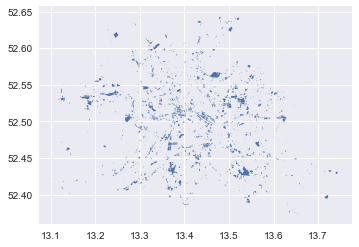

In [7]:
comm_plz.plot()

# Ausreißer 193 !!!! what the Fuck same PLZ, geringe fläche aber die selbe EInwohneranzahl wie 12559 ... reduziere auf 10 EInwohner

In [8]:
comm_plz

,geometry
0,"POLYGON ((13.34602 52.52693, 13.34602 52.52788..."
1,"POLYGON ((13.34814 52.53142, 13.34802 52.53151..."
2,"POLYGON ((13.36006 52.53266, 13.36047 52.53217..."
3,"POLYGON ((13.35636 52.53738, 13.35628 52.53725..."
4,"POLYGON ((13.31894 52.53107, 13.31928 52.53040..."
...,...
2303,"POLYGON ((13.57064 52.54962, 13.57070 52.54991..."
2304,"POLYGON ((13.37885 52.46704, 13.37879 52.46642..."
2305,"POLYGON ((13.41620 52.51413, 13.41627 52.51416..."
2306,"MULTIPOLYGON (((13.36357 52.47858, 13.36357 52..."


In [9]:
from pyproj import Geod
from shapely import wkt

# specify a named ellipsoid
geod = Geod(ellps="WGS84")
area = abs(geod.geometry_area_perimeter(comm_plz["geometry"][0])[0])
print('# Geodesic area: {:.3f} m^2'.format(area))


nlist = []
for i in range(len(comm_plz)):
    nlist.append(abs(geod.geometry_area_perimeter(comm_plz["geometry"][i])[0]))
nlist[0:10]
# # Geodesic area: 13205034.647 m^2

# Geodesic area: 84432.415 m^2


[84432.41462354388,
 2312.064818032726,
 2263.297437593341,
 13294.024469787895,
 15504.9967488189,
 2495.10602587834,
 20460.585712283122,
 9127.612305605086,
 159697.52704179194,
 31829.452037140727]

In [10]:
comm_plz["area_m2"] = nlist

In [11]:
comm_plz["area_km2"] = comm_plz["area_m2"]/1000000

In [12]:
comm_plz

,geometry,area_m2,area_km2
0,"POLYGON ((13.34602 52.52693, 13.34602 52.52788...",84432.414624,0.084432
1,"POLYGON ((13.34814 52.53142, 13.34802 52.53151...",2312.064818,0.002312
2,"POLYGON ((13.36006 52.53266, 13.36047 52.53217...",2263.297438,0.002263
3,"POLYGON ((13.35636 52.53738, 13.35628 52.53725...",13294.024470,0.013294
4,"POLYGON ((13.31894 52.53107, 13.31928 52.53040...",15504.996749,0.015505
...,...,...,...
2303,"POLYGON ((13.57064 52.54962, 13.57070 52.54991...",2344.973300,0.002345
2304,"POLYGON ((13.37885 52.46704, 13.37879 52.46642...",3341.455044,0.003341
2305,"POLYGON ((13.41620 52.51413, 13.41627 52.51416...",7893.587908,0.007894
2306,"MULTIPOLYGON (((13.36357 52.47858, 13.36357 52...",72881.858780,0.072882


# SUMME


In [14]:
comm_plz["area_km2"].sum()

39.543554676642614

# X Einwohner pro km2 

In [17]:
comm_plz["area_m2"][0:5]
#[geopy.distance.geodesic(point,start_point).meters for point in zip(long,lat)]

0    84432.414624
1     2312.064818
2     2263.297438
3    13294.024470
4    15504.996749
Name: area_m2, dtype: float64

In [18]:
comm_plz['area_m2'] = comm_plz['area_m2'].round(decimals=3)

In [19]:
comm_plz["area_m2"][0:5]

0    84432.415
1     2312.065
2     2263.297
3    13294.024
4    15504.997
Name: area_m2, dtype: float64

In [20]:
comm_plz

,geometry,area_m2,area_km2
0,"POLYGON ((13.34602 52.52693, 13.34602 52.52788...",84432.415,0.084432
1,"POLYGON ((13.34814 52.53142, 13.34802 52.53151...",2312.065,0.002312
2,"POLYGON ((13.36006 52.53266, 13.36047 52.53217...",2263.297,0.002263
3,"POLYGON ((13.35636 52.53738, 13.35628 52.53725...",13294.024,0.013294
4,"POLYGON ((13.31894 52.53107, 13.31928 52.53040...",15504.997,0.015505
...,...,...,...
2303,"POLYGON ((13.57064 52.54962, 13.57070 52.54991...",2344.973,0.002345
2304,"POLYGON ((13.37885 52.46704, 13.37879 52.46642...",3341.455,0.003341
2305,"POLYGON ((13.41620 52.51413, 13.41627 52.51416...",7893.588,0.007894
2306,"MULTIPOLYGON (((13.36357 52.47858, 13.36357 52...",72881.859,0.072882


In [21]:
comm_plz.to_file("../results/POI-retail-commercial-improved.geojson", driver='GeoJSON')

In [22]:
top3comm_plz = comm_plz.sort_values(by='area_m2', ascending=False).head(3)
top5comm_plz = comm_plz.sort_values(by='area_m2', ascending=False).head(5)
top10comm_plz = comm_plz.sort_values(by='area_m2', ascending=False).head(10)

In [23]:
top3comm_plz

,geometry,area_m2,area_km2
2281,"POLYGON ((13.52446 52.43367, 13.52685 52.43211...",1143716.897,1.143717
859,"POLYGON ((13.47686 52.56331, 13.47658 52.56457...",766260.622,0.766261
558,"POLYGON ((13.26652 52.50220, 13.26672 52.50183...",552329.805,0.552330


In [24]:
top5comm_plz

,geometry,area_m2,area_km2
2281,"POLYGON ((13.52446 52.43367, 13.52685 52.43211...",1143716.897,1.143717
859,"POLYGON ((13.47686 52.56331, 13.47658 52.56457...",766260.622,0.766261
558,"POLYGON ((13.26652 52.50220, 13.26672 52.50183...",552329.805,0.552330
819,"POLYGON ((13.37819 52.43489, 13.37811 52.43472...",462849.368,0.462849
1089,"POLYGON ((13.23826 52.53886, 13.23791 52.53887...",462773.445,0.462773


<AxesSubplot:>

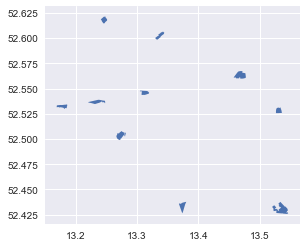

In [26]:
top10comm_plz.plot()

In [27]:
top3comm_plz.to_file("../results/POI-retail-commercial-top3.geojson", driver='GeoJSON')
top5comm_plz.to_file("../results/POI-retail-commercial-top5.geojson", driver='GeoJSON')
top10comm_plz.to_file("../results/POI-retail-commercial-top10.geojson", driver='GeoJSON')

In [28]:
tail3comm_plz = comm_plz.sort_values(by='area_m2', ascending=False).tail(3)
tail5comm_plz = comm_plz.sort_values(by='area_m2', ascending=False).tail(5)
tail10comm_plz = comm_plz.sort_values(by='area_m2', ascending=False).tail(10)

In [29]:
tail3comm_plz.to_file("../results/POI-retail-commercial-tail3.geojson", driver='GeoJSON')
tail5comm_plz.to_file("../results/POI-retail-commercial-tail5.geojson", driver='GeoJSON')
tail10comm_plz.to_file("../results/POI-retail-commercial-tail10.geojson", driver='GeoJSON')

# CENTERPOINTS

In [32]:
comm_plz_point = comm_plz

In [33]:
comm_plz_point["geometry"] = comm_plz["geometry"].centroid

<ipython-input-33-09f126810b0b>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  comm_plz_point["geometry"] = comm_plz["geometry"].centroid


In [34]:
comm_plz_point.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2308 entries, 0 to 2307
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  2308 non-null   geometry
 1   area_m2   2308 non-null   float64 
 2   area_km2  2308 non-null   float64 
dtypes: float64(2), geometry(1)
memory usage: 54.2 KB


In [35]:
comm_plz_point.to_file("../results/POI-retail-commercial-centerpoints.geojson", driver='GeoJSON')

In [36]:
top3comm_plz_points = comm_plz_point.sort_values(by='area_m2', ascending=False).head(3)
top5comm_plz_points = comm_plz_point.sort_values(by='area_m2', ascending=False).head(5)
top10comm_plz_points = comm_plz_point.sort_values(by='area_m2', ascending=False).head(10)

In [37]:
top3comm_plz_points.to_file("../results/POI-retail-commercial-centerpoints-top3.geojson", driver='GeoJSON')
top5comm_plz_points.to_file("../results/POI-retail-commercial-centerpoints-top5.geojson", driver='GeoJSON')
top10comm_plz_points.to_file("../results/POI-retail-commercial-centerpoints-top10.geojson", driver='GeoJSON')

In [38]:
tail3comm_plz_points = comm_plz_point.sort_values(by='area_m2', ascending=False).tail(3)
tail5comm_plz_points = comm_plz_point.sort_values(by='area_m2', ascending=False).tail(5)
tail10comm_plz_points = comm_plz_point.sort_values(by='area_m2', ascending=False).tail(10)

In [39]:
tail3comm_plz_points.to_file("../results/POI-retail-commercial-centerpoints-tail3.geojson", driver='GeoJSON')
tail5comm_plz_points.to_file("../results/POI-retail-commercial-centerpoints-tail5.geojson", driver='GeoJSON')
tail10comm_plz_points.to_file("../results/POI-retail-commercial-centerpoints-tail10.geojson", driver='GeoJSON')

In [40]:
tail10comm_plz_points

,geometry,area_m2,area_km2
475,POINT (13.23537 52.60873),382.999,0.000383
1012,POINT (13.50625 52.40525),354.160,0.000354
1289,POINT (13.34924 52.53328),338.166,0.000338
1209,POINT (13.31496 52.45049),324.365,0.000324
809,POINT (13.38451 52.55515),314.688,0.000315
1893,POINT (13.54914 52.50966),275.029,0.000275
748,POINT (13.39545 52.48921),206.312,0.000206
778,POINT (13.32735 52.57584),83.878,0.000084
928,POINT (13.42347 52.57772),39.436,0.000039
986,POINT (13.51618 52.56963),18.756,0.000019


In [43]:
tail5comm_plz_points

,geometry,area_m2,area_km2
1893,POINT (13.54914 52.50966),275.029,0.000275
748,POINT (13.39545 52.48921),206.312,0.000206
778,POINT (13.32735 52.57584),83.878,0.000084
928,POINT (13.42347 52.57772),39.436,0.000039
986,POINT (13.51618 52.56963),18.756,0.000019


In [42]:
tail5comm_plz_points

,geometry,area_m2,area_km2
1893,POINT (13.54914 52.50966),275.029,0.000275
748,POINT (13.39545 52.48921),206.312,0.000206
778,POINT (13.32735 52.57584),83.878,0.000084
928,POINT (13.42347 52.57772),39.436,0.000039
986,POINT (13.51618 52.56963),18.756,0.000019
